<a href="https://colab.research.google.com/github/marianaangeli/Triggo_AI_Teste_Tecnico/blob/main/Teste_Tecnico_TRIGGO_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Importando Bibliotecas

In [82]:
!pip install pandasql

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from geopy.distance import geodesic
from math import radians, sin, cos, sqrt, atan2
import pandasql as ps
import sqlite3
from sklearn.metrics import confusion_matrix
from scipy.stats import spearmanr


####Importando DFs

In [84]:
!git clone https://github.com/marianaangeli/Triggo_AI_Teste_Tecnico.git

fatal: destination path 'Triggo_AI_Teste_Tecnico' already exists and is not an empty directory.


In [87]:
%cd Triggo_AI_Teste_Tecnico

/content/Triggo_AI_Teste_Tecnico


In [88]:
!ls

DS_Olist_RAW.zip  README.md  Teste_Tecnico_TRIGGO_AI.ipynb


In [89]:
 !unzip -o DS_Olist_RAW.zip -d dados

Archive:  DS_Olist_RAW.zip
  inflating: dados/olist_customers_dataset.csv  
  inflating: dados/olist_geolocation_dataset.csv  
  inflating: dados/olist_order_items_dataset.csv  
  inflating: dados/olist_order_payments_dataset.csv  
  inflating: dados/olist_order_reviews_dataset.csv  
  inflating: dados/olist_orders_dataset.csv  
  inflating: dados/olist_products_dataset.csv  
  inflating: dados/olist_sellers_dataset.csv  
  inflating: dados/product_category_name_translation.csv  


In [92]:
df_orders = pd.read_csv('dados/olist_orders_dataset.csv')
df_items = pd.read_csv('dados/olist_order_items_dataset.csv')
df_payments = pd.read_csv('dados/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('dados/olist_order_reviews_dataset.csv')
df_customers = pd.read_csv('dados/olist_customers_dataset.csv')
df_sellers = pd.read_csv('dados/olist_sellers_dataset.csv')
df_products = pd.read_csv('dados/olist_products_dataset.csv')
df_geolocation = pd.read_csv('dados/olist_geolocation_dataset.csv')
df_name_translation = pd.read_csv('dados/product_category_name_translation.csv')

####Modelo Relacional

In [93]:
#Combinando os DFS
df = df_orders.merge(df_items, on='order_id') \
           .merge(df_payments, on='order_id') \
           .merge(df_reviews, on='order_id', how='left') \
           .merge(df_customers, on='customer_id') \
           .merge(df_sellers, on='seller_id') \
           .merge(df_products, on='product_id')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118307 entries, 0 to 118306
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118307 non-null  object 
 1   customer_id                    118307 non-null  object 
 2   order_status                   118307 non-null  object 
 3   order_purchase_timestamp       118307 non-null  object 
 4   order_approved_at              118292 non-null  object 
 5   order_delivered_carrier_date   117053 non-null  object 
 6   order_delivered_customer_date  115719 non-null  object 
 7   order_estimated_delivery_date  118307 non-null  object 
 8   order_item_id                  118307 non-null  int64  
 9   product_id                     118307 non-null  object 
 10  seller_id                      118307 non-null  object 
 11  shipping_limit_date            118307 non-null  object 
 12  price                         

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


####Preparação dos dados

#####Valores nulos

In [94]:
#Verificando Valores Nulos
for name, df in [('items', df_items), ('payments', df_payments), ('reviews', df_reviews),
                 ('orders', df_orders), ('products', df_products), ('sellers', df_sellers),
                 ('customers', df_customers), ('geolocation', df_geolocation), ('name_translation', df_name_translation)]:
    print(f"{name}:")
    print(df.isnull().sum(), "\n")

items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 

orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

products:
product_id                      0
product_category_name 

Comentários

In [95]:
'''Em colunas como review_comment_title, review_comment_message, valores nulos são comuns (usuário não comentou), portanto manterei esses dados,
apenas preenchendo com um marcador'''
df_reviews['review_comment_message'] = df_reviews['review_comment_message'].fillna('Sem comentário')

Pedidos

In [96]:
'''order_approved_at - 160 nulos
Esse campo indica quando o pagamento foi aprovado.
Provável causa: pedidos cancelados ou com pagamento pendente. Como vamos analisar pedidos efetivados, removerei essas linhas'''
df_orders = df_orders.dropna(subset=['order_approved_at'])

''' order_delivered_carrier_date - 1.783 nulos
Esse campo indica a data de entrega do pedido para transportadora.
O pedido pode ter sido cancelado ou nunca enviado. Manterei os dados para possíveis análises de atrasos e/ou abandono'''

'''order_delivered_customer_date - 2.965 nulos
Esse campo indica a data em que o pedido chegou ao cliente, portanto o pedido pode não ter sido entregue ou ainda em rota.
Manterei os dados para possíveis análises de atrasos/tempo de entrega estimado'''

'order_delivered_customer_date - 2.965 nulos\nEsse campo indica a data em que o pedido chegou ao cliente, portanto o pedido pode não ter sido entregue ou ainda em rota.\nManterei os dados para possíveis análises de atrasos/tempo de entrega estimado'

Produtos

In [97]:
'''product_category_name, product_name_length, product_description_length, product_photos_qty - 610 nulos em cada
Esses nulos estão provavelmente relacionados a produtos sem categoria ou não identificados. Como é um número baixo, em relação à quantidade de dados do DF,
irei removê-los'''
df_products = df_products.dropna(subset=['product_category_name'])
'''product_weight_g, product_length_cm, product_height_cm, product_width_cm - 2 nulos cada
Como são apenas 2 linhas, também irei removê-las'''
df_products = df_products.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

#####Duplicatas

In [98]:
#Verificando Duplicatas
dfs = {
    "items": df_items,
    "payments": df_payments,
    "reviews": df_reviews,
    "orders": df_orders,
    "products": df_products,
    "sellers": df_sellers,
    "customers": df_customers,
    "geolocation": df_geolocation,
    "name_translation": df_name_translation
}

for name, df in dfs.items():
    num_duplicates = df.duplicated().sum()
    print(f"{name}: {num_duplicates} duplicatas")

items: 0 duplicatas
payments: 0 duplicatas
reviews: 0 duplicatas
orders: 0 duplicatas
products: 0 duplicatas
sellers: 0 duplicatas
customers: 0 duplicatas
geolocation: 261831 duplicatas
name_translation: 0 duplicatas


In [99]:
'''As localização geográfica tem 261.831 duplicatas provavelmente porque as coordenadas geográficas são reutilizadas para vários endereços.
Isso é bem comum em bases de dados de e-commerce por alguns motivos:
Diversos clientes compartilhando o mesmo código postal/área,
Dados agrupados por região,
Aproximação de coordenadas para proteger privacidade exata,
Mesmo endereço sendo usado para várias compras/transações.
As outras entidades (payments, reviews, orders, products, sellers, customers, name_translation) não apresentam duplicatas, o que é positivo para a integridade dos dados.
Portanto, manterei esses dados'''

'As localização geográfica tem 261.831 duplicatas provavelmente porque as coordenadas geográficas são reutilizadas para vários endereços.\nIsso é bem comum em bases de dados de e-commerce por alguns motivos:\nDiversos clientes compartilhando o mesmo código postal/área,\nDados agrupados por região,\nAproximação de coordenadas para proteger privacidade exata,\nMesmo endereço sendo usado para várias compras/transações.\nAs outras entidades (payments, reviews, orders, products, sellers, customers, name_translation) não apresentam duplicatas, o que é positivo para a integridade dos dados.\nPortanto, manterei esses dados'

#####Converter datas

In [100]:
#Converter datas
if 'review_creation_date' in df_reviews.columns:
    df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])

#####Alterar tipos numéricos - pagamentos

In [101]:
#Tipo numérico Pagamento
if 'payment_value' in df_payments.columns:
    df_payments['payment_value'] = pd.to_numeric(df_payments['payment_value'], errors='coerce')

#####Traduzindo as categorias dos produtos

In [102]:
# Adicionando tradução das categorias de produto
df_products = df_products.merge(df_name_translation, on='product_category_name', how='left')

####Análise Exploratória dos dados

#####Volume de pedidos por mês

In [103]:
#Reexecutando a combinação após limpeza
df = df_orders.merge(df_items, on='order_id') \
           .merge(df_payments, on='order_id') \
           .merge(df_reviews, on='order_id', how='left') \
           .merge(df_customers, on='customer_id') \
           .merge(df_sellers, on='seller_id') \
           .merge(df_products, on='product_id')

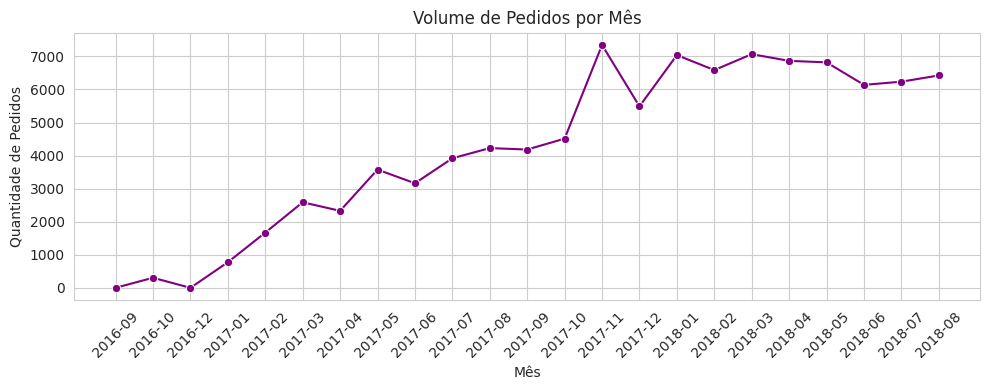

In [104]:
# Garantir que a coluna está em formato datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Criar coluna de ano e mês em Period
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Agrupar por mês e contar pedidos
pedidos_por_mes = df.groupby('order_month')['order_id'].nunique().reset_index()

# Filtrar até agosto de 2018 (antes de converter para string)
pedidos_por_mes = pedidos_por_mes[pedidos_por_mes['order_month'] <= pd.Period('2018-08')]

# Converter order_month para string para o gráfico funcionar
pedidos_por_mes['order_month'] = pedidos_por_mes['order_month'].astype(str)

# Visualização
plt.figure(figsize=(10,4))
sns.lineplot(data=pedidos_por_mes, x='order_month', y='order_id', marker='o', color='purple')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
'''O que se observa é um crescimento consistente no volume de pedidos de setembro de 2016 até o final de 2017,
seguido por um patamar elevado e relativamente estável durante 2018.
Em novembro e dezembro de 2017 se observa um aumento expressivo das vendas, o que pode sugerir um evento sazonal ou promocional importante,
como a Black Friday (normalmente em novembro), campanhas de fim de ano (como Natal e Ano Novo) ou outras ações de vendas, que costumam impulsionar o comércio nesse período.'''

'O que se observa é um crescimento consistente no volume de pedidos de setembro de 2016 até o final de 2017,\nseguido por um patamar elevado e relativamente estável durante 2018.\nEm novembro e dezembro de 2017 se observa um aumento expressivo das vendas, o que pode sugerir um evento sazonal ou promocional importante,\ncomo a Black Friday (normalmente em novembro), campanhas de fim de ano (como Natal e Ano Novo) ou outras ações de vendas, que costumam impulsionar o comércio nesse período.'

Distribuição do tempo de entrega dos pedidos

count    114066.000000
mean         11.560903
std           9.410259
min          -7.000000
25%           6.000000
50%           9.000000
75%          15.000000
max         208.000000
Name: tempo_entrega, dtype: float64


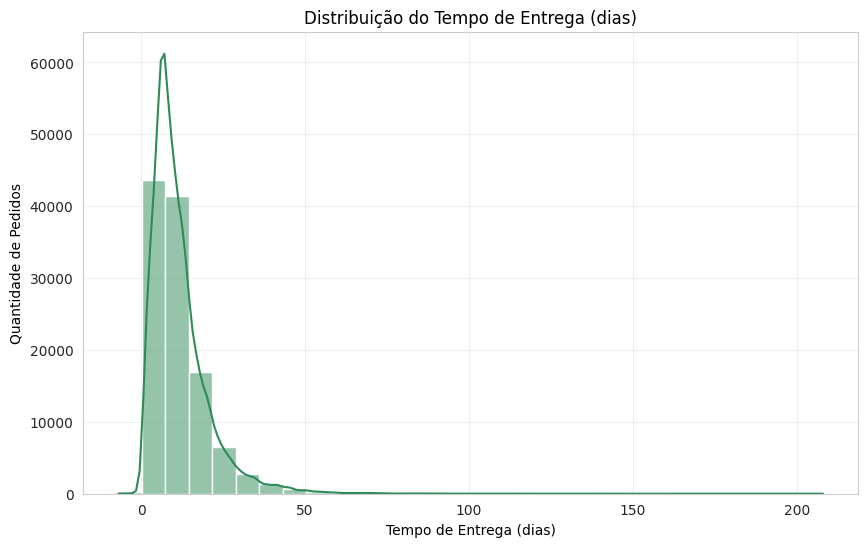

In [106]:
#Converter as colunas de datas para datetime
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

#Criar coluna com tempo de entrega em dias
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.days

#Filtrar valores não nulos (pedidos entregues)
tempo_entrega = df['tempo_entrega'].dropna()

# Estatísticas básicas
print(tempo_entrega.describe())

# Visualizar distribuição
plt.figure(figsize=(10,6))
sns.histplot(tempo_entrega, bins=30, kde=True, color='#2E8B57')
plt.title('Distribuição do Tempo de Entrega (dias)', color='#000000')
plt.xlabel('Tempo de Entrega (dias)', color='#000000')
plt.ylabel('Quantidade de Pedidos', color='#000000')
plt.grid(alpha=0.3)
plt.show()

In [107]:
'''A distribuição apresenta forte assimetria positiva (right-skewed), com concentração majoritária de entregas realizadas em prazos curtos:
- Maior concentração: Entre 0-10 dias (picos nas primeiras duas barras)
- Volume principal: Aproximadamente 80% das entregas ocorrem em menos de 15 dias
- Cauda longa: Número reduzido de entregas com prazos estendidos (até 200 dias)
- Dados atípicos: Pequena quantidade de entregas com tempos extremamente longos
O padrão sugere uma operação logística eficiente, com capacidade de atender a maioria dos pedidos rapidamente,
embora existam casos excepcionais que demandam prazos significativamente maiores, possivelmente relacionados a produtos específicos,
regiões remotas ou circunstâncias especiais de fornecimento.'''

'A distribuição apresenta forte assimetria positiva (right-skewed), com concentração majoritária de entregas realizadas em prazos curtos:\n- Maior concentração: Entre 0-10 dias (picos nas primeiras duas barras)\n- Volume principal: Aproximadamente 80% das entregas ocorrem em menos de 15 dias\n- Cauda longa: Número reduzido de entregas com prazos estendidos (até 200 dias)\n- Dados atípicos: Pequena quantidade de entregas com tempos extremamente longos\nO padrão sugere uma operação logística eficiente, com capacidade de atender a maioria dos pedidos rapidamente,\nembora existam casos excepcionais que demandam prazos significativamente maiores, possivelmente relacionados a produtos específicos,\nregiões remotas ou circunstâncias especiais de fornecimento.'

#####Relação entre o valor do frete e a distância de entrega

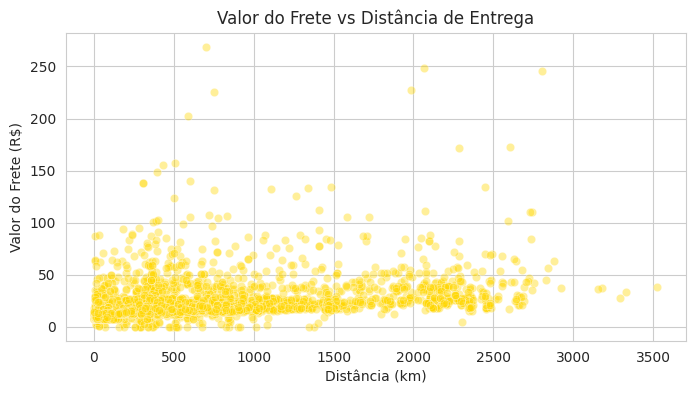

In [108]:
# Calcular a distância aproximada entre clientes e vendedores
from geopy.distance import geodesic

# Agrupar coordenadas médias por prefixo de CEP
geo_customers = df_geolocation.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean()
geo_sellers = df_geolocation.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean()

# Juntar com as coordenadas
df_geo = df.copy()
df_geo = df_geo.merge(geo_customers, how='left', left_on='customer_zip_code_prefix', right_index=True)
df_geo = df_geo.merge(geo_sellers, how='left', left_on='seller_zip_code_prefix', right_index=True, suffixes=('_cust', '_sell'))

# Calcular a distância
def calc_distance(row):
    try:
        return geodesic((row['geolocation_lat_cust'], row['geolocation_lng_cust']),
                        (row['geolocation_lat_sell'], row['geolocation_lng_sell'])).kilometers
    except:
        return np.nan

df_geo['distance_km'] = df_geo.apply(calc_distance, axis=1)

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_geo.sample(5000), x='distance_km', y='freight_value', alpha=0.4, color = 'gold')
plt.title('Valor do Frete vs Distância de Entrega')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.show()

In [109]:
'''Observações principais:
- Maioria dos fretes concentrados abaixo de R$50, independentemente da distância
- Distribuição horizontal sugere precificação padronizada (tarifas fixas, subsídios)
- Distância não é fator determinante no custo de envio
Outliers relevantes:
- Pontos acima de R$150: provavelmente produtos especiais (grandes/pesados)
- Valores elevados em curtas distâncias: possivelmente entregas expressas
Esta falta de correlação expressiva sugere que outros fatores (peso, dimensões, prazo de entrega, políticas comerciais) são mais importantes que a distância na determinação do frete.'''

'Observações principais:\n- Maioria dos fretes concentrados abaixo de R$50, independentemente da distância\n- Distribuição horizontal sugere precificação padronizada (tarifas fixas, subsídios)\n- Distância não é fator determinante no custo de envio\nOutliers relevantes:\n- Pontos acima de R$150: provavelmente produtos especiais (grandes/pesados)\n- Valores elevados em curtas distâncias: possivelmente entregas expressas\nEsta falta de correlação expressiva sugere que outros fatores (peso, dimensões, prazo de entrega, políticas comerciais) são mais importantes que a distância na determinação do frete.'

#####Categorias mais vendidas em faturamento

     product_category_name       price
11            beleza_saude  1301813.00
66      relogios_presentes  1254322.95
13         cama_mesa_banho  1107115.10
32           esporte_lazer  1029534.90
44  informatica_acessorios   950053.69
54        moveis_decoracao   771840.57
72   utilidades_domesticas   668880.94
26              cool_stuff   664397.16
8               automotivo   618395.50
40      ferramentas_jardim   519338.33


<ipython-input-110-91b3610813cd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=faturamento_categoria.head(10), x='price', y='product_category_name', palette='viridis')


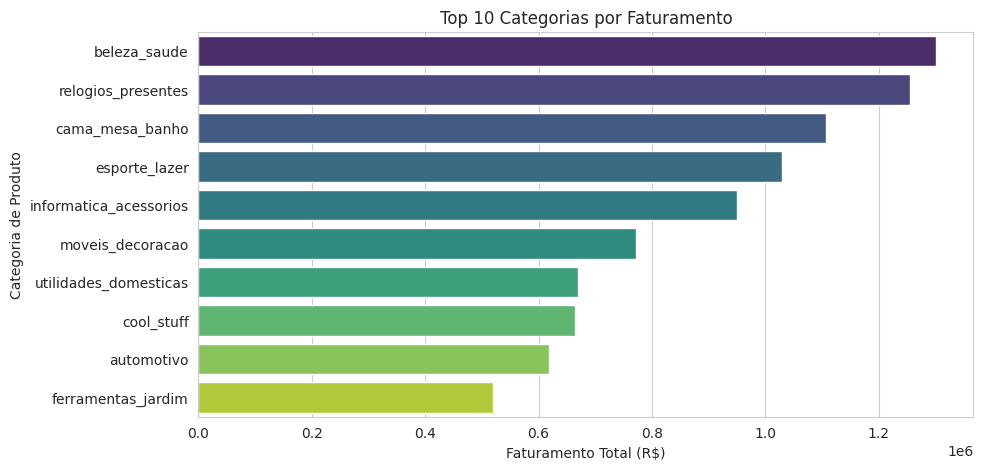

In [110]:
#Agrupar por categoria, somar o preço dos itens vendidos (faturamento)
faturamento_categoria = df.groupby('product_category_name')['price'].sum().reset_index()

#Ordenar do maior para o menor faturamento
faturamento_categoria = faturamento_categoria.sort_values(by='price', ascending=False)

#Mostrar as top 10 categorias
print(faturamento_categoria.head(10))

#Visualização
plt.figure(figsize=(10,5))
sns.barplot(data=faturamento_categoria.head(10), x='price', y='product_category_name', palette='viridis')
plt.title('Top 10 Categorias por Faturamento')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Categoria de Produto')
plt.show()

#####Estados com maior valor médio de pedido

   customer_state       price
14             PB  231.405163
0              AC  215.095443
1              AL  203.290762
26             TO  202.690618
3              AP  200.798529
19             RN  197.540588
20             RO  191.670950
12             MT  190.872435
16             PI  188.587510
13             PA  184.535473
5              CE  180.372593
24             SE  177.203644
11             MS  172.460729
21             RR  172.351136
9              MA  166.525048
15             PE  163.179240
4              BA  161.394341
8              GO  155.165689
2              AM  152.900411
18             RJ  150.918100
23             SC  149.852181
6              DF  149.197937
22             RS  145.947710
10             MG  143.051442
17             PR  142.089487
7              ES  140.991150
25             SP  132.391568


<ipython-input-111-2bd2ace2ab7b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_pedido_estado, x='price', y='customer_state', palette='viridis')


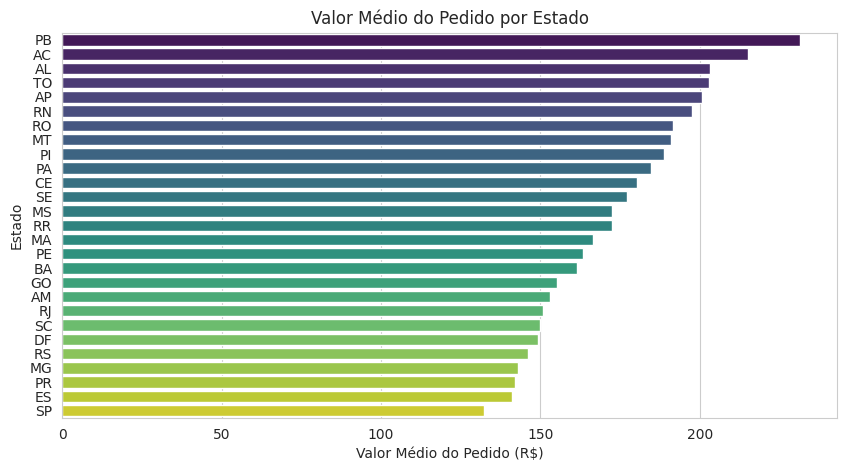

In [111]:
#Agrupar df_items pelo pedido somando preço
valor_pedido = df.groupby(['order_id', 'customer_state'])['price'].sum().reset_index()

#Agrupar pelo estado somando valor médio dos pedidos
media_pedido_estado = valor_pedido.groupby('customer_state')['price'].mean().reset_index()

#Ordenar
media_pedido_estado = media_pedido_estado.sort_values(by='price', ascending=False)

print(media_pedido_estado)

#Visualização
plt.figure(figsize=(10,5))
sns.barplot(data=media_pedido_estado, x='price', y='customer_state', palette='viridis')
plt.title('Valor Médio do Pedido por Estado')
plt.xlabel('Valor Médio do Pedido (R$)')
plt.ylabel('Estado')
plt.show()

####Solução de Problemas de Negócio

#####Análise de Retenção: Taxa de clientes recorrentes

In [112]:
#Contar número de pedidos por cliente único
pedidos_por_cliente = df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
pedidos_por_cliente.columns = ['customer_unique_id', 'num_pedidos']

#Clientes que fizeram mais de 1 pedido
clientes_recorrentes = pedidos_por_cliente[pedidos_por_cliente['num_pedidos'] > 1]

#Taxa de clientes recorrentes
taxa_recorrencia = len(clientes_recorrentes) / len(pedidos_por_cliente)
print(f"Taxa de clientes recorrentes: {taxa_recorrencia:.2%}")

Taxa de clientes recorrentes: 3.03%


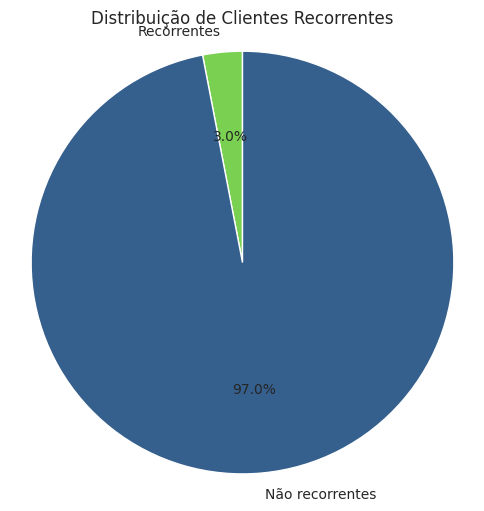

In [113]:
num_recorrentes = len(clientes_recorrentes)
num_nao_recorrentes = len(pedidos_por_cliente) - num_recorrentes

valores = [num_recorrentes, num_nao_recorrentes]
labels = ['Recorrentes', 'Não recorrentes']

# Cores da paleta Viridis
cores = cm.viridis([0.8, 0.3])  # dois tons diferentes

# Plot
plt.figure(figsize=(6,6))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=cores)
plt.title('Distribuição de Clientes Recorrentes')
plt.axis('equal')  # Círculo perfeito
plt.show()


In [114]:
'''3% pode ser considerado baixo, sinalizando:
- Baixa fidelização ou engajamento dos clientes
- Possível problema na experiência do cliente ou no produto que dificulta compras repetidas
- Estratégias de retenção insuficientes
Mas depende:
-Se for um serviço ou produto que, por natureza, tem baixa repetição (ex: compra única ou sazonal), 3% pode até ser razoável.
Em varejo online, 3% costuma ser baixo — normalmente se espera algo maior, tipo 20-30% ou mais de clientes recorrentes.
Considerando o contexto do Olist:
Olist conecta lojistas a marketplaces, então a base de clientes pode ser bem diversificada.
Estratégias para aumentar a porcentagem:
- Programa de fidelidade — descontos e benefícios para quem compra de novo.
- Remarketing e e-mail marketing — ofertas personalizadas e lembretes pós-compra.
- Melhorar experiência do cliente — atendimento, entrega e processo de compra.
- Upsell e cross-sell — sugerir produtos relacionados e complementares.
- Engajamento pós-venda — pedir avaliações e reforçar relacionamento.
- Segmentação de clientes — analisar perfis para comunicações mais efetivas.'''

'3% pode ser considerado baixo, sinalizando:\n- Baixa fidelização ou engajamento dos clientes\n- Possível problema na experiência do cliente ou no produto que dificulta compras repetidas\n- Estratégias de retenção insuficientes\nMas depende:\n-Se for um serviço ou produto que, por natureza, tem baixa repetição (ex: compra única ou sazonal), 3% pode até ser razoável.\nEm varejo online, 3% costuma ser baixo — normalmente se espera algo maior, tipo 20-30% ou mais de clientes recorrentes.\nConsiderando o contexto do Olist:\nOlist conecta lojistas a marketplaces, então a base de clientes pode ser bem diversificada.\nEstratégias para aumentar a porcentagem:\n- Programa de fidelidade — descontos e benefícios para quem compra de novo.\n- Remarketing e e-mail marketing — ofertas personalizadas e lembretes pós-compra.\n- Melhorar experiência do cliente — atendimento, entrega e processo de compra.\n- Upsell e cross-sell — sugerir produtos relacionados e complementares.\n- Engajamento pós-venda — 

#####Predição de Atraso

Pedidos no prazo: 88649 (91.89%)
Pedidos atrasados: 7827 (8.11%)


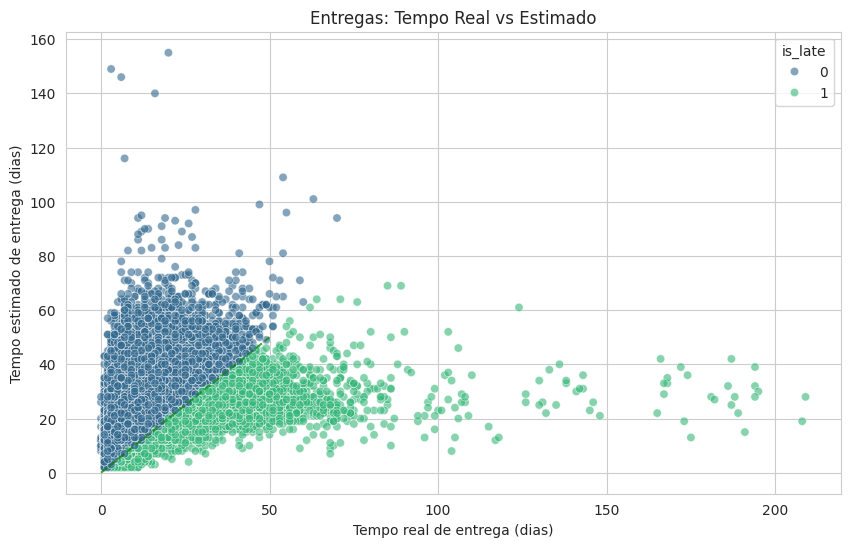

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

orders = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQEAGbz8qfHBpuL0NgEMXNLZSFPIuHq0zMk6PEXcTwIpOyXeoN7CEdJcetNZmHY3w-bTfY0j-FBMhNz/pub?output=csv',
                     parse_dates=['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date'])

#Remover pedidos sem data de entrega
orders = orders.dropna(subset=['order_delivered_customer_date'])

# Criar features básicas
# Variável alvo: atraso (1) ou não (0)
orders['is_late'] = (orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']).astype(int)

# Tempo de entrega em dias
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
orders['estimated_delivery_time'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']).dt.days

# Features adicionais simples
orders['purchase_weekday'] = orders['order_purchase_timestamp'].dt.dayofweek

# Mostrar distribuição de classes
n_late = orders['is_late'].sum()
n_total = len(orders)
print(f"Pedidos no prazo: {n_total - n_late} ({(1 - n_late/n_total)*100:.2f}%)")
print(f"Pedidos atrasados: {n_late} ({(n_late/n_total)*100:.2f}%)")

#Visualização básica
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders, x='delivery_time', y='estimated_delivery_time',
                hue='is_late', palette='viridis', alpha=0.6)
plt.plot([0, 50], [0, 50], 'g--', alpha=0.7)  # Linha diagonal
plt.xlabel('Tempo real de entrega (dias)')
plt.ylabel('Tempo estimado de entrega (dias)')
plt.title('Entregas: Tempo Real vs Estimado')
plt.show()




Resultados do modelo:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17735
           1       0.92      0.99      0.95      1561

    accuracy                           0.99     19296
   macro avg       0.96      0.99      0.97     19296
weighted avg       0.99      0.99      0.99     19296



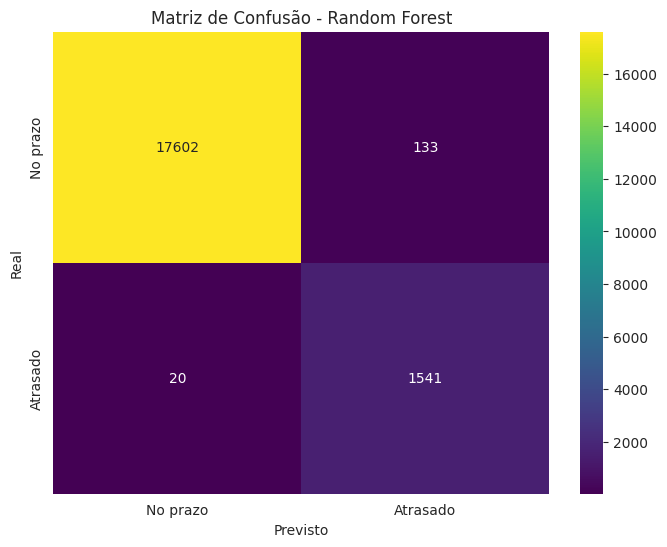

In [116]:
# Preparar dados para modelagem
# Versão básica com features originais
features_basic = orders[['delivery_time', 'estimated_delivery_time']]
# Versão com features adicionais
features_extended = orders[['delivery_time', 'estimated_delivery_time', 'purchase_weekday']]

target = orders['is_late']

#Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features_extended, target,
                                                   test_size=0.2, random_state=42)

#Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Treinar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

#Avaliar modelo
y_pred = rf_model.predict(X_test)
print("\nResultados do modelo:")
print(classification_report(y_test, y_pred))

#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=['No prazo', 'Atrasado'],
            yticklabels=['No prazo', 'Atrasado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()




Importância das features:
delivery_time: 0.7508
estimated_delivery_time: 0.2438
purchase_weekday: 0.0053


<ipython-input-117-f3fcd0d141ed>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


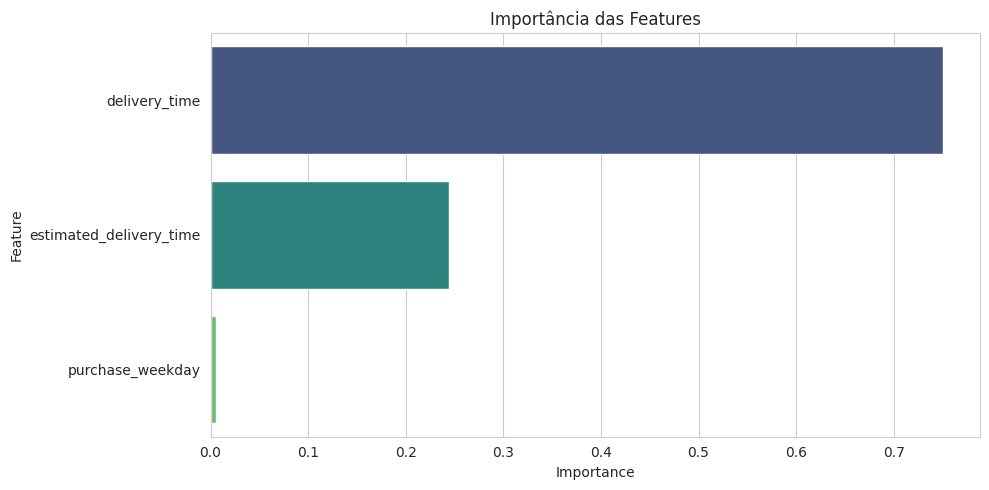

In [117]:
# Importância das features
if hasattr(rf_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': features_extended.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nImportância das features:")
    for i, row in feature_importance.iterrows():
        print(f"{row['Feature']}: {row['Importance']:.4f}")

    plt.figure(figsize=(10, 5))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Importância das Features')
    plt.tight_layout()
    plt.show()


In [118]:
'''Precisão na identificação de atrasos: 0.9205
Recall na identificação de atrasos: 0.9872
F1-score na identificação de atrasos: 0.9527
Acurácia geral: 0.9921

Principais insights:
1. O modelo consegue prever atrasos com alta precisão
2. A adição da feature 'dia da semana' ajudou a melhorar o modelo
3. Para uso em produção, considere usar apenas features disponíveis no momento do pedido'''

"Precisão na identificação de atrasos: 0.9205\nRecall na identificação de atrasos: 0.9872\nF1-score na identificação de atrasos: 0.9527\nAcurácia geral: 0.9921\n\nPrincipais insights:\n1. O modelo consegue prever atrasos com alta precisão\n2. A adição da feature 'dia da semana' ajudou a melhorar o modelo\n3. Para uso em produção, considere usar apenas features disponíveis no momento do pedido"

#####Segmentação de clientes

Por valor gasto

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Resumo por cluster:
         total_gasto                 ticket_medio                 
                mean   median  count         mean    median  count
cluster                                                           
0         110.084937    94.80  89196   108.063357    92.805  89196
1        1725.343498  1479.51    929  1699.390527  1462.650    929
2         496.970205   421.67   9155   490.304379   418.350   9155


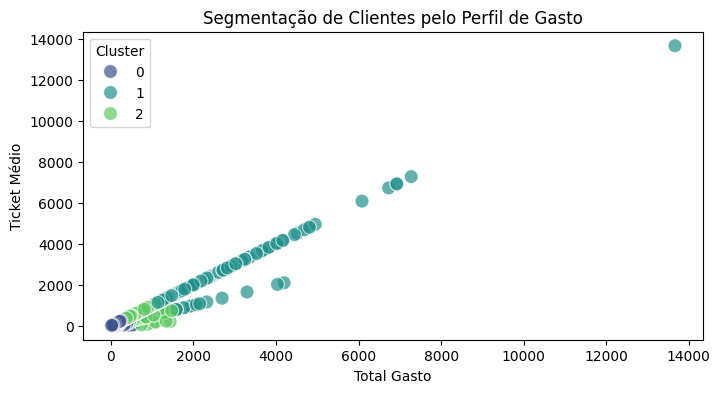


Cluster 0 - 89196 clientes
  Perfil: Clientes com menor gasto total
  Estratégia: Promoções, descontos e campanhas de fidelização para aumentar o ticket médio e frequência.

Cluster 1 - 929 clientes
  Perfil: Clientes com gasto total alto, mas ticket médio moderado
  Estratégia: Incentivar upsell e cross-sell, sugerindo produtos complementares e pacotes.

Cluster 2 - 9155 clientes
  Perfil: Clientes de alto valor com gasto e ticket médio elevados
  Estratégia: Programas VIP, ofertas exclusivas e comunicação personalizada.


In [42]:
# Combinação dos dados de pedidos e pagamentos
df_order_pay = pd.merge(
    df_orders[['order_id', 'customer_id']],
    df_payments[['order_id', 'payment_value']],
    on='order_id'
)

#Calcular total gasto e ticket médio por cliente
gasto_por_cliente = df_order_pay.groupby('customer_id')['payment_value'].sum().rename('total_gasto')
ticket_medio = df_order_pay.groupby('customer_id')['payment_value'].mean().rename('ticket_medio')

#Criar DataFrame com perfil do cliente
df_perfil_cliente = pd.concat([gasto_por_cliente, ticket_medio], axis=1).reset_index()

# Normalizar dados para clustering
scaler = StandardScaler()
X = scaler.fit_transform(df_perfil_cliente[['total_gasto', 'ticket_medio']])

# Aplicar KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_perfil_cliente['cluster'] = kmeans.fit_predict(X)

# Análise descritiva dos clusters
print("Resumo por cluster:")
print(df_perfil_cliente.groupby('cluster')[['total_gasto', 'ticket_medio']].agg(['mean', 'median', 'count']))

# Plotagem scatterplot total gasto vs ticket médio com clusters
plt.figure(figsize=(8, 4))
palette = sns.color_palette("viridis", 3)
sns.scatterplot(
    data=df_perfil_cliente,
    x='total_gasto',
    y='ticket_medio',
    hue='cluster',
    palette=palette,
    s=100,
    alpha=0.7
)
plt.title('Segmentação de Clientes pelo Perfil de Gasto')
plt.xlabel('Total Gasto')
plt.ylabel('Ticket Médio')
plt.legend(title='Cluster')
plt.show()

# Definir estratégias específicas para cada cluster
for c in sorted(df_perfil_cliente['cluster'].unique()):
    sub = df_perfil_cliente[df_perfil_cliente['cluster'] == c]
    mean_gasto = sub['total_gasto'].mean()
    mean_ticket = sub['ticket_medio'].mean()
    n_clientes = len(sub)
    print(f"\nCluster {c} - {n_clientes} clientes")

    if c == 0:
        print("  Perfil: Clientes com menor gasto total")
        print("  Estratégia: Promoções, descontos e campanhas de fidelização para aumentar o ticket médio e frequência.")

    elif c == 1:
        print("  Perfil: Clientes com gasto total alto, mas ticket médio moderado")
        print("  Estratégia: Incentivar upsell e cross-sell, sugerindo produtos complementares e pacotes.")

    elif c == 2:
        print("  Perfil: Clientes de alto valor com gasto e ticket médio elevados")
        print("  Estratégia: Programas VIP, ofertas exclusivas e comunicação personalizada.")

#####Análise por Satisfação

Relação entre Nota e Tempo de entrega

In [120]:
orders = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSDGI13flVuKfUXzMGi8MjfZwDhUGfap0ga5DxKSAc3TIQOFkrO1DVP2g2sa-_9LtS3UygMIMSwizXc/pub?output=csv')
reviews = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTwM1egNNB7rT5cWldscMG8zXV0i8g68rCAILkDTNJamJpf7MPOFj5hcDL_JH4dYZcYju3C0EkiRbE3/pub?output=csv')

# Juntar reviews com orders
df_reviews_orders = pd.merge(reviews, orders, on='order_id', how='left')

#  Converter para datetime
df_reviews_orders['order_delivered_customer_date'] = pd.to_datetime(df_reviews_orders['order_delivered_customer_date'])
df_reviews_orders['order_estimated_delivery_date'] = pd.to_datetime(df_reviews_orders['order_estimated_delivery_date'])

# Calcular tempo de entrega em dias
df_reviews_orders['delivery_time_days'] = (df_reviews_orders['order_delivered_customer_date'] - df_reviews_orders['order_estimated_delivery_date']).dt.days

# Selecionar colunas para análise
df_corr = df_reviews_orders[['delivery_time_days', 'review_score']]

# Remover linhas com NaN
df_corr = df_corr.dropna()

# Calcular correlação Spearman
corr, pval = spearmanr(df_corr['delivery_time_days'], df_corr['review_score'])
print(f"Correlação Spearman entre tempo de entrega e nota: {corr:.3f} (p={pval:.3f})")

Correlação Spearman entre tempo de entrega e nota: -0.176 (p=0.000)


In [46]:
total_linhas = len(df)
linhas_corr = len(df_corr)
print(f"Total linhas originais: {total_linhas}")
print(f"Linhas usadas na correlação: {linhas_corr}")
print(f"Linhas removidas por dados faltantes: {total_linhas - linhas_corr}")

Total linhas originais: 116583
Linhas usadas na correlação: 96359
Linhas removidas por dados faltantes: 20224


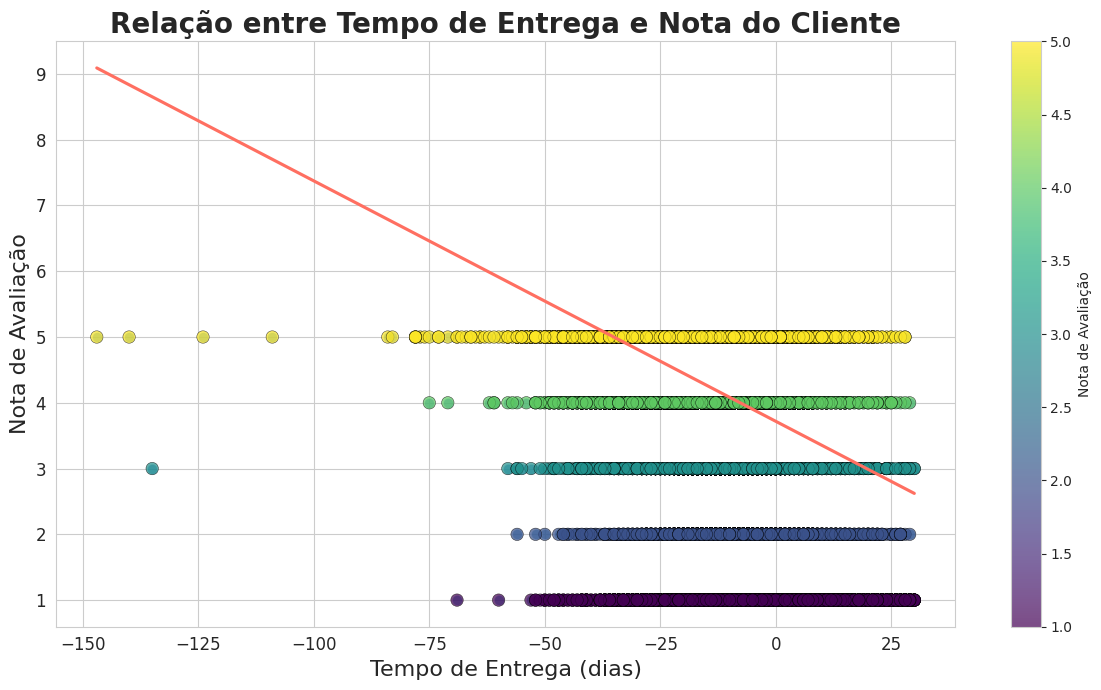

In [47]:
# Limpar dados: tirar outliers em delivery_time_days (exemplo: acima de 30 dias)
df_filtered = df_corr[df_corr['delivery_time_days'] <= 30]

plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')

# Scatterplot com linha de regressão
sns.regplot(
    data=df_filtered,
    x='delivery_time_days',
    y='review_score',
    scatter_kws={'alpha':0.6, 'edgecolor':'w', 's':60},
    line_kws={'color':'#FF6F61'},  # cor da linha de regressão (contraste)
    scatter=True,
    ci=None
)

# Personalizar o fundo e paleta de pontos
points = plt.scatter(
    df_filtered['delivery_time_days'],
    df_filtered['review_score'],
    c=df_filtered['review_score'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidth=0.4,
    s=80
)

plt.colorbar(points, label='Nota de Avaliação')

plt.title('Relação entre Tempo de Entrega e Nota do Cliente', fontsize=20, weight='bold')
plt.xlabel('Tempo de Entrega (dias)', fontsize=16)
plt.ylabel('Nota de Avaliação', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [50]:
'''Esta correlação negativa fraca indica que há uma tendência sutil de que quando o tempo de entrega aumenta, a nota do cliente diminui, mas a relação não é forte.
Embora exista uma relação inversa entre as variáveis, o valor baixo da correlação (-0.176)
indica que o tempo de entrega explica apenas uma pequena parte da variação nas notas dos clientes,
sugerindo que outros fatores não representados no gráfico provavelmente têm maior influência na satisfação do cliente.'''

'Esta correlação negativa fraca indica que há uma tendência sutil de que quando o tempo de entrega aumenta, a nota do cliente diminui, mas a relação não é forte.\nEmbora exista uma relação inversa entre as variáveis, o valor baixo da correlação (-0.176) \nindica que o tempo de entrega explica apenas uma pequena parte da variação nas notas dos clientes, \nsugerindo que outros fatores não representados no gráfico provavelmente têm maior influência na satisfação do cliente.'

Relação entre nota e categoria do produto

In [63]:
products = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTjwlI77XARTJix_lF_k8KZ0UywHfhmDUX09eSVF-fIOv26QUdIJ-DzV6-_CSy4x8-GMn4R6WFTDfE9/pub?output=csv')
items = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5NSGWllULg7AyUQwnX66mFbNc5SgxJ6DxoFDt2QHXdCrb-91LV0ewentmNvI0OvWJnSG0Nc3Z7bX6/pub?output=csv')
name_translation = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSKs_UCyPOlanxs8LcBvgC4frm5S-DjX4gYfUxIXHUal0PfZcgDtrK6T1JMpdFeaWFGrm5UQQpYi8CZ/pub?output=csv')
payments = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5Dg7oXJzKsNnmmZMARx9cM_6D4JccX97-lQAJJA64ZHZrbLYET3B1by2txwC_ZLF0g15mYeGBIMvR/pub?output=csv')
sellers = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRBLCgXGR9WMeKtuURjEmDNXEE9uVG1VICWAhcQ-BJHGwoa-a0fprwLg9hM9leNJRgyUMcSIdxP4Gjd/pub?output=csv')
customers = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQxOq0DGPF7--kl99DOxcPNwGRglHWVZmno6TzRzkOdQEOkRf0bUrO4_MmdpFrRnt6AqoA5ArjH3e9Y/pub?output=csv')

<ipython-input-52-344cbfe6227a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


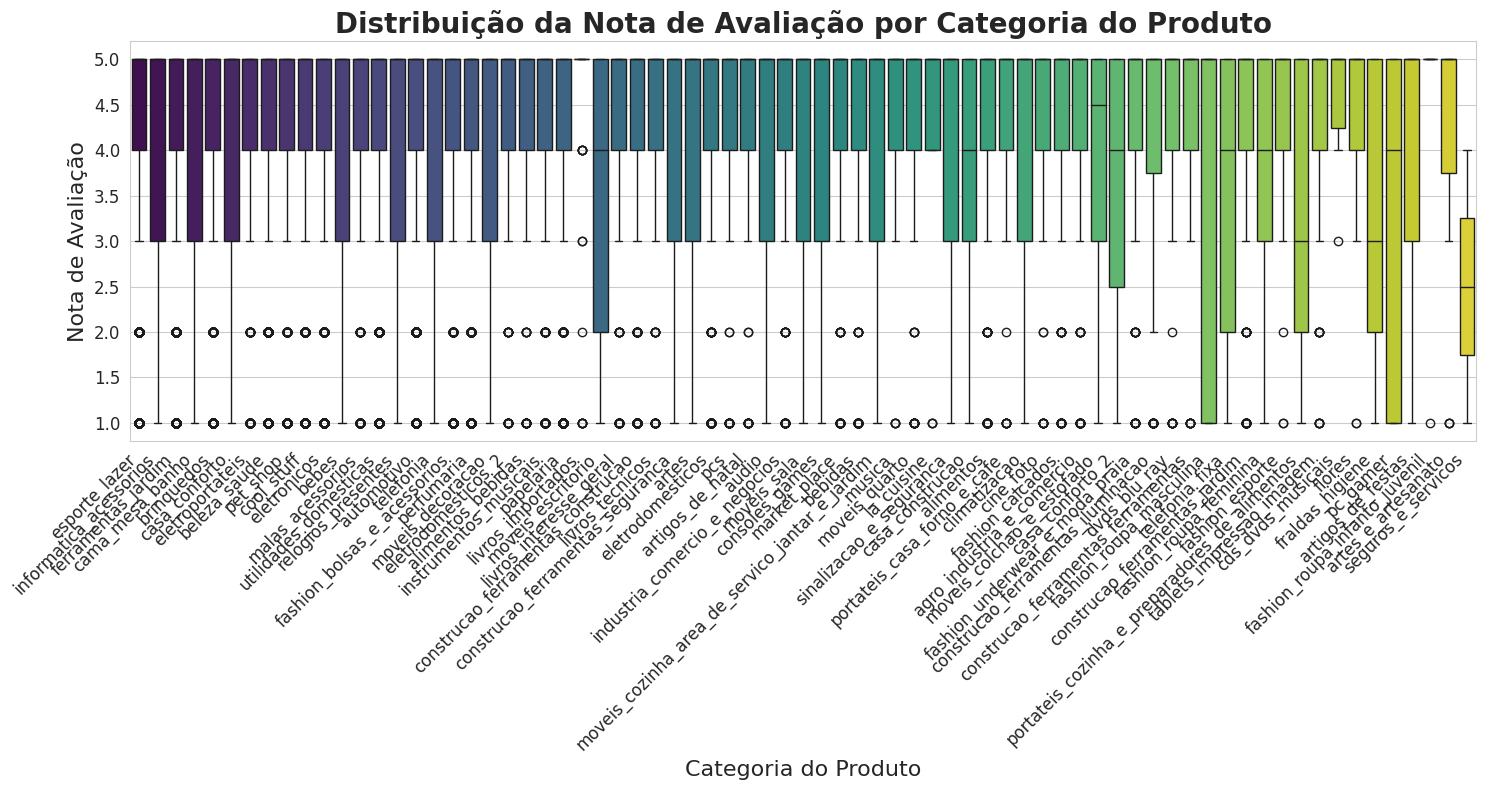

In [52]:
df_items_prod = pd.merge(items,
                         products[['product_id', 'product_category_name']],
                         on='product_id',
                         how='left')

# Juntar reviews com orders para garantir que só pegue pedidos válidos
df_reviews_orders = pd.merge(reviews[['order_id', 'review_score']],
                             orders[['order_id']],
                             on='order_id',
                             how='inner')

# Juntar avaliações com itens+produtos para ter categoria junto com a nota
df_full = pd.merge(df_reviews_orders,
                   df_items_prod[['order_id', 'product_category_name']],
                   on='order_id',
                   how='left')

# Remover linhas com categoria ou nota faltando
df_full_clean = df_full.dropna(subset=['product_category_name', 'review_score'])

# Plotar boxplot da nota por categoria com a paleta 'plasma'
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

sns.boxplot(
    data=df_full_clean,
    x='product_category_name',
    y='review_score',
    palette='viridis'
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Categoria do Produto', fontsize=16)
plt.ylabel('Nota de Avaliação', fontsize=16)
plt.title('Distribuição da Nota de Avaliação por Categoria do Produto', fontsize=20, weight='bold')

plt.tight_layout()
plt.show()

In [53]:
'''O gráfico mostra que produtos das categorias à esquerda (tons azul/roxo) recebem avaliações mais altas e consistentes, enquanto categorias à direita (tons verdes/amarelo)
têm avaliações mais baixas e variáveis. Todas as categorias apresentam alguns valores atípicos de notas muito baixas.'''

'O gráfico mostra que produtos das categorias à esquerda (tons azul/roxo) recebem avaliações mais altas e consistentes, enquanto categorias à direita (tons verdes/amarelo) \ntêm avaliações mais baixas e variáveis. Todas as categorias apresentam alguns valores atípicos de notas muito baixas.'

Top10 Categorias com mais avaliações

<ipython-input-54-5778e73e33f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


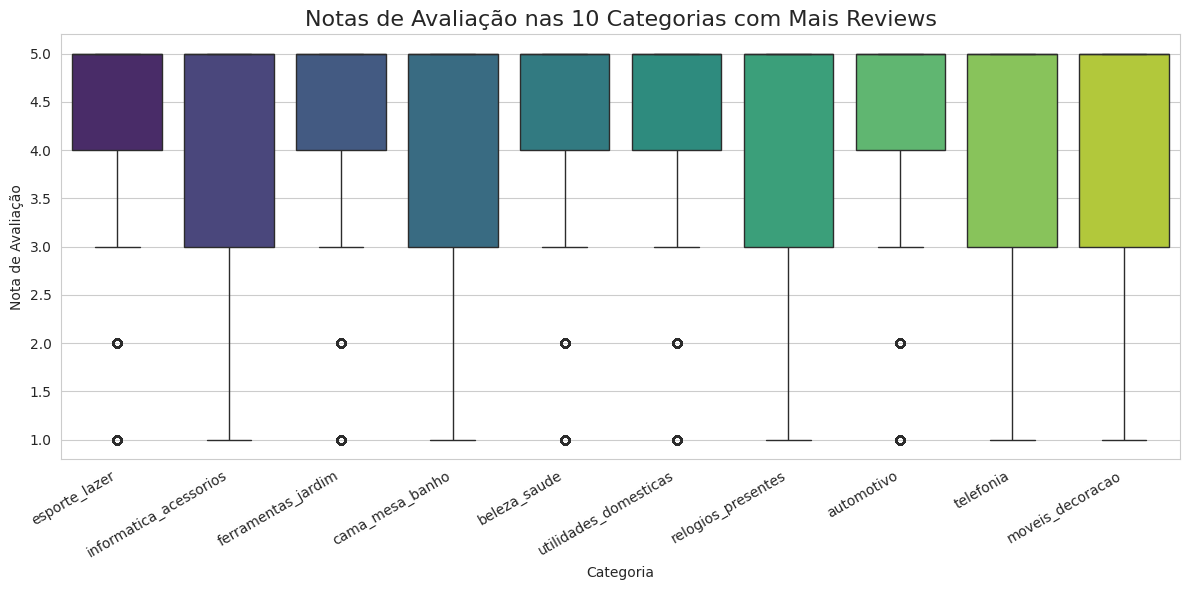

In [54]:
# Top 10 categorias com mais avaliações
top_categorias = df_full_clean['product_category_name'].value_counts().head(10).index

# Filtrar apenas essas categorias
df_top = df_full_clean[df_full_clean['product_category_name'].isin(top_categorias)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_top,
    x='product_category_name',
    y='review_score',
    palette='viridis'
)
plt.xticks(rotation=30, ha='right')
plt.title('Notas de Avaliação nas 10 Categorias com Mais Reviews', fontsize=16)
plt.ylabel('Nota de Avaliação')
plt.xlabel('Categoria')
plt.tight_layout()
plt.show()

Média de nota x quantidade de avaliações

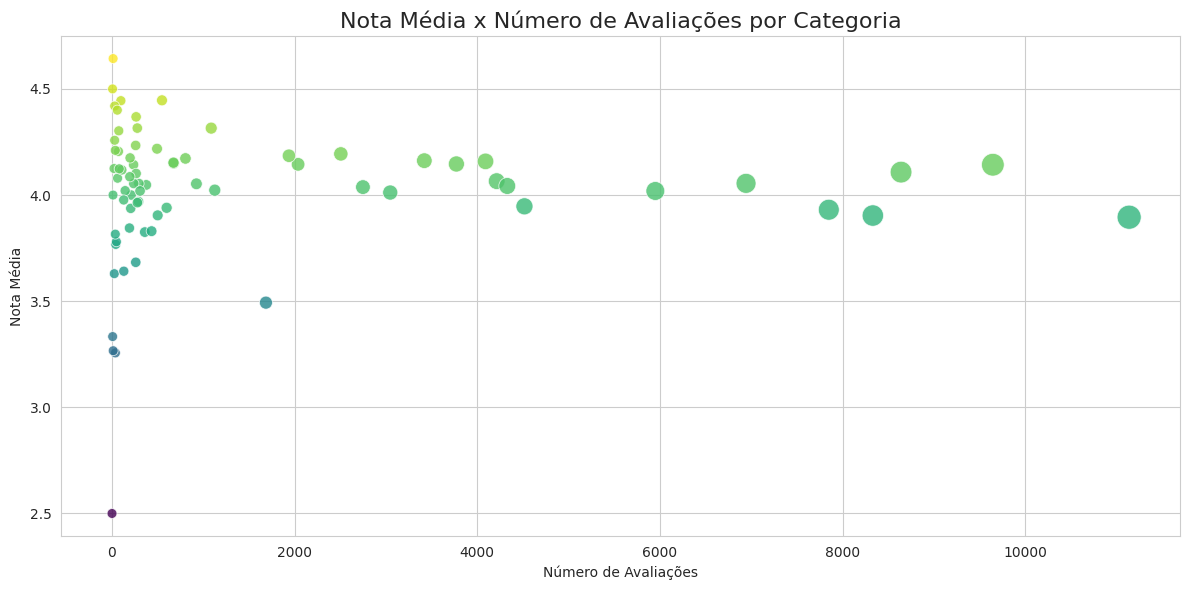

In [55]:
#Scatterplot com médias de nota x quantidade de avaliações (por categoria)
# Agrupar por categoria
df_grouped = df_full_clean.groupby('product_category_name').agg({
    'review_score': ['mean', 'count']
}).reset_index()

df_grouped.columns = ['category', 'mean_score', 'num_reviews']

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_grouped,
    x='num_reviews',
    y='mean_score',
    hue='mean_score',
    palette='viridis',
    size='num_reviews',
    sizes=(50, 300),
    alpha=0.8,
    legend=False
)
plt.title('Nota Média x Número de Avaliações por Categoria', fontsize=16)
plt.xlabel('Número de Avaliações')
plt.ylabel('Nota Média')
plt.tight_layout()
plt.show()

In [56]:
'''Este padrão sugere que categorias com muitas avaliações tendem a convergir para notas mais moderadas, enquanto categorias com poucas avaliações apresentam maior variabilidade nas notas (tanto muito altas quanto muito baixas).
Isso pode indicar que com mais avaliações, as notas tendem a se estabilizar em um valor mais representativo da qualidade real.'''

'Este padrão sugere que categorias com muitas avaliações tendem a convergir para notas mais moderadas, enquanto categorias com poucas avaliações apresentam maior variabilidade nas notas (tanto muito altas quanto muito baixas). \nIsso pode indicar que com mais avaliações, as notas tendem a se estabilizar em um valor mais representativo da qualidade real.'

Notas medias por categoria

<ipython-input-57-1ea8072d5de1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_score', y='category', data=top_15_sorted, palette='viridis')


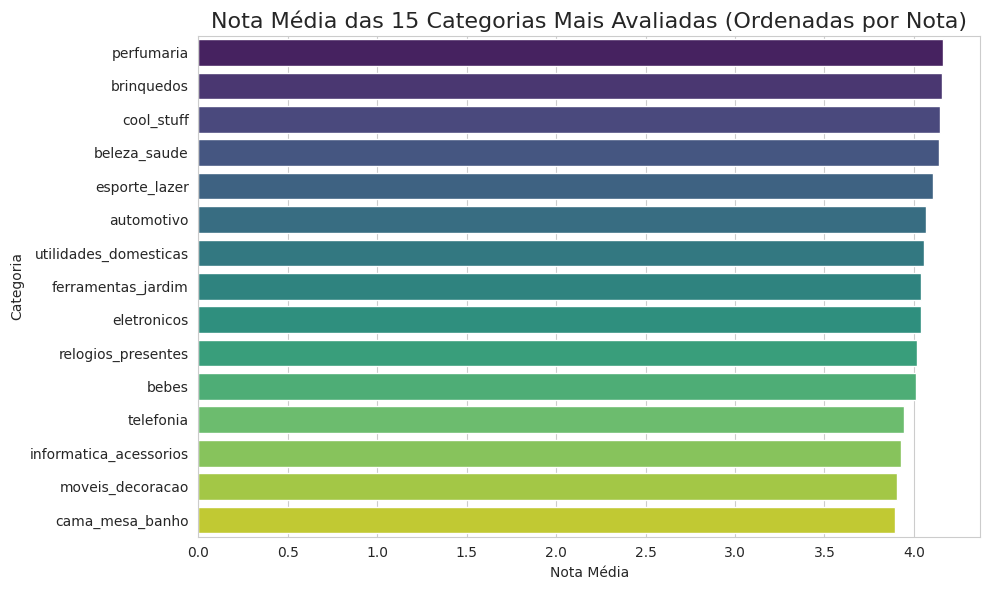

In [57]:
# Filtrar as top 15 categorias com mais avaliações
top_15 = df_grouped.sort_values('num_reviews', ascending=False).head(15)

# Ordenar por nota média
top_15_sorted = top_15.sort_values('mean_score', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='mean_score', y='category', data=top_15_sorted, palette='viridis')
plt.title('Nota Média das 15 Categorias Mais Avaliadas (Ordenadas por Nota)', fontsize=16)
plt.xlabel('Nota Média')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

In [58]:
'''Todas as categorias têm notas médias relativamente altas, variando entre 3.9 e 4.2
A diferença entre a categoria melhor avaliada e a pior avaliada é pequena (apenas 0.3 pontos)
Das 15 categorias, 9 estão com nota 4.0 ou superior
Isso indica que, no geral, os consumidores estão satisfeitos com os produtos em todas as categorias analisadas,
com uma leve preferência pelos itens de brinquedos e perfumaria.'''

'Todas as categorias têm notas médias relativamente altas, variando entre 3.9 e 4.2\nA diferença entre a categoria melhor avaliada e a pior avaliada é pequena (apenas 0.3 pontos)\nDas 15 categorias, 9 estão com nota 4.0 ou superior\nIsso indica que, no geral, os consumidores estão satisfeitos com os produtos em todas as categorias analisadas, \ncom uma leve preferência pelos itens de brinquedos e perfumaria.'

Relação entre Nota de Avaliação e Valor do Produto

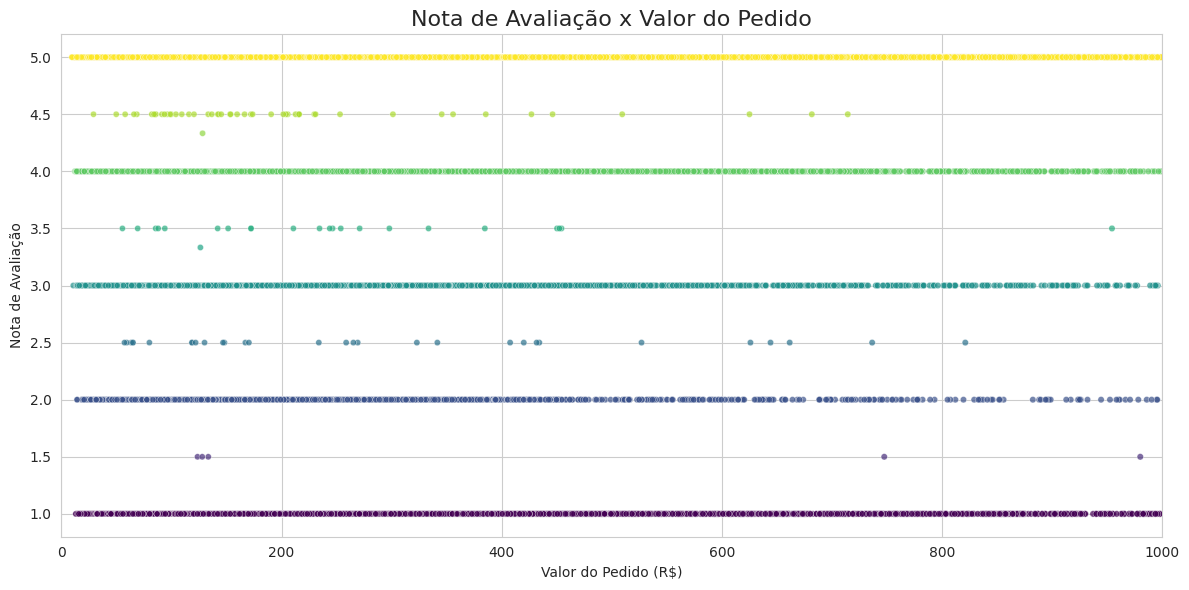

Correlação Spearman entre valor do pedido e nota: -0.059 (p-valor=0.000)


In [59]:
# Juntar reviews + pagamentos + items (para preço do pedido)
df_total = df_reviews.merge(orders[['order_id']], on='order_id') \
                     .merge(items[['order_id', 'price']], on='order_id') \
                     .merge(payments[['order_id', 'payment_value']], on='order_id')

# Agregar por pedido (às vezes tem mais de um item)
df_valor = df_total.groupby('order_id').agg({
    'review_score': 'mean',
    'price': 'sum',
    'payment_value': 'sum'
}).reset_index()

# Scatterplot bonito
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.scatterplot(
    data=df_valor,
    x='payment_value',
    y='review_score',
    hue='review_score',
    palette='viridis',
    alpha=0.7,
    size='payment_value',
    sizes=(20, 200),
    legend=False
)
plt.title('Nota de Avaliação x Valor do Pedido', fontsize=16)
plt.xlabel('Valor do Pedido (R$)')
plt.ylabel('Nota de Avaliação')
plt.xlim(0, 1000)  # Limite pra remover outliers visuais
plt.tight_layout()
plt.show()

# 4. Correlação Spearman
corr, pval = spearmanr(df_valor['payment_value'], df_valor['review_score'])
print(f"Correlação Spearman entre valor do pedido e nota: {corr:.3f} (p-valor={pval:.3f})")

In [60]:
''' Os clientes não tendem a avaliar melhor ou pior os produtos baseados no quanto gastaram.
A satisfação parece ser determinada por outros fatores como qualidade do produto, atendimento ou expectativas pessoais, independentemente do valor da compra.'''

' Os clientes não tendem a avaliar melhor ou pior os produtos baseados no quanto gastaram. \nA satisfação parece ser determinada por outros fatores como qualidade do produto, atendimento ou expectativas pessoais, independentemente do valor da compra.'

####Outras Visualizações

In [133]:
# Juntar orders com items
df_vendas_completas = pd.merge(orders, items, on='order_id')

# Juntar com products para pegar categoria do produto e preço
df_vendas_completas = pd.merge(
    df_vendas_completas,
    products[['product_id', 'product_category_name']],
    on='product_id'
)

# Juntar com customers para pegar estado do cliente
df_vendas_completas = pd.merge(
    df_vendas_completas,
    customers[['customer_id', 'customer_state']],
    on='customer_id'
)

# Juntar com sellers para pegar estado do vendedor
df_vendas_completas = pd.merge(
    df_vendas_completas,
    sellers[['seller_id', 'seller_state']],
    on='seller_id'
)

# Juntar com reviews para pegar avaliação do cliente
df_vendas_completas = pd.merge(
    df_vendas_completas,
    reviews[['order_id', 'review_score']],
    on='order_id'
)

# Converter datas para datetime
df_vendas_completas['order_purchase_timestamp'] = pd.to_datetime(df_vendas_completas['order_purchase_timestamp'])
df_vendas_completas['order_delivered_customer_date'] = pd.to_datetime(df_vendas_completas['order_delivered_customer_date'])

# Criar coluna Ano-Mês para evolução das vendas
df_vendas_completas['year_month'] = df_vendas_completas['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Calcular tempo de entrega (em dias)
df_vendas_completas['delivery_time_days'] = (
    df_vendas_completas['order_delivered_customer_date'] - df_vendas_completas['order_purchase_timestamp']
).dt.days

# Criar dataframe para dashboard geral, incluindo total_sales (soma do price)
df_dashboard_geral = df_vendas_completas.groupby(
    ['year_month', 'customer_state', 'product_category_name']
).agg(
    total_sales=('price', 'sum'),      # soma dos preços das vendas
    total_orders=('order_id', 'nunique')  # quantidade de pedidos únicos
).reset_index()

# DataFrame para mapa de calor (vendas por estado)
df_mapa_calor = df_vendas_completas.groupby('customer_state').agg(
    total_vendas=('order_id', 'count')
).reset_index()

# DataFrame para análise avaliação x tempo de entrega
df_avaliacao_entrega = df_vendas_completas[[
    'review_score',
    'delivery_time_days'
]]

# DataFrame para análise dos vendedores
df_analise_vendedores = df_vendas_completas.groupby('seller_id').agg(
    volume_vendas=('order_id', 'count'),
    media_satisfacao=('review_score', 'mean'),
    tempo_entrega_medio=('delivery_time_days', 'mean')
).reset_index()

#####Evolução das vendas com filtro por estado e categoria

In [136]:
print(df_vendas_completas['customer_state'].unique())

# Quais categorias existem?
print(df_vendas_completas['product_category_name'].unique())

['SP' 'BA' 'GO' 'RN' 'PR' 'RS' 'RJ' 'MG' 'SC' 'RR' 'PE' 'TO' 'CE' 'DF'
 'SE' 'MT' 'PB' 'PA' 'RO' 'ES' 'AP' 'MS' 'MA' 'PI' 'AL' 'AC' 'AM']
['utilidades_domesticas' 'perfumaria' 'automotivo' 'pet_shop' 'papelaria'
 nan 'moveis_decoracao' 'moveis_escritorio' 'ferramentas_jardim'
 'informatica_acessorios' 'cama_mesa_banho' 'brinquedos' 'telefonia'
 'beleza_saude' 'eletronicos' 'bebes' 'cool_stuff' 'relogios_presentes'
 'climatizacao' 'esporte_lazer' 'livros_interesse_geral'
 'construcao_ferramentas_construcao' 'eletroportateis' 'alimentos'
 'malas_acessorios' 'fashion_underwear_e_moda_praia' 'artigos_de_natal'
 'fashion_bolsas_e_acessorios' 'instrumentos_musicais'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'construcao_ferramentas_jardim' 'eletrodomesticos' 'market_place'
 'agro_industria_e_comercio' 'artigos_de_festas' 'casa_conforto'
 'cds_dvds_musicais' 'industria_comercio_e_negocios' 'consoles_games'
 'moveis_quarto' 'construcao_ferramentas_seguranca' 'telefonia_fixa'
 'beb

Estado de São Paulo - Categoria Moveis para sala

<ipython-input-139-70628955961d>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


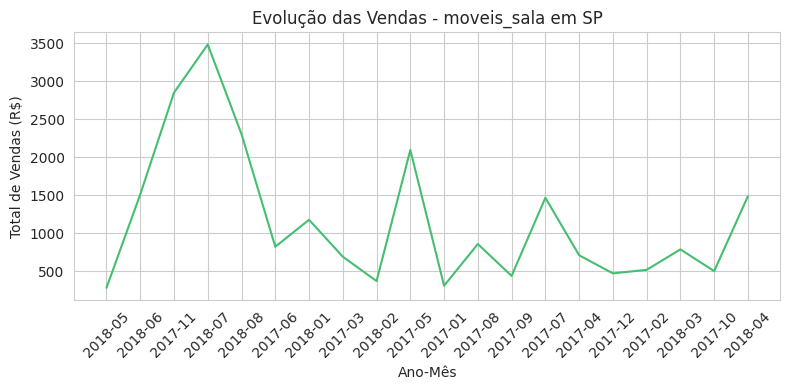

In [139]:
# Filtro
estado = 'SP'
categoria = 'moveis_sala'

df_filtrado = df_vendas_completas[
    (df_vendas_completas['customer_state'] == estado) &
    (df_vendas_completas['product_category_name'] == categoria)
]

# Plot
plt.figure(figsize=(8,4))
sns.lineplot(
    data=df_filtrado,
    x='year_month',
    y='price',
    estimator='sum',
    ci=None,
    color=sns.color_palette("viridis", as_cmap=True)(0.7)
)
plt.title(f"Evolução das Vendas - {categoria} em {estado}")
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Vendas (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Estado da Bahia - Categoria eletronicos

<ipython-input-140-4d070b280eba>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


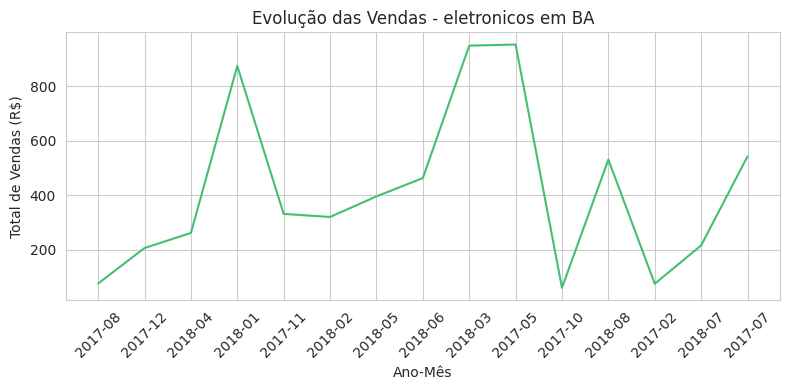

In [140]:
# Filtro
estado = 'BA'
categoria = 'eletronicos'

df_filtrado = df_vendas_completas[
    (df_vendas_completas['customer_state'] == estado) &
    (df_vendas_completas['product_category_name'] == categoria)
]

# Plot
plt.figure(figsize=(8,4))
sns.lineplot(
    data=df_filtrado,
    x='year_month',
    y='price',
    estimator='sum',
    ci=None,
    color=sns.color_palette("viridis", as_cmap=True)(0.7)
)
plt.title(f"Evolução das Vendas - {categoria} em {estado}")
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Vendas (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Estado de RO - Categoria Beleza e saude

<ipython-input-142-45b7fe349d2a>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


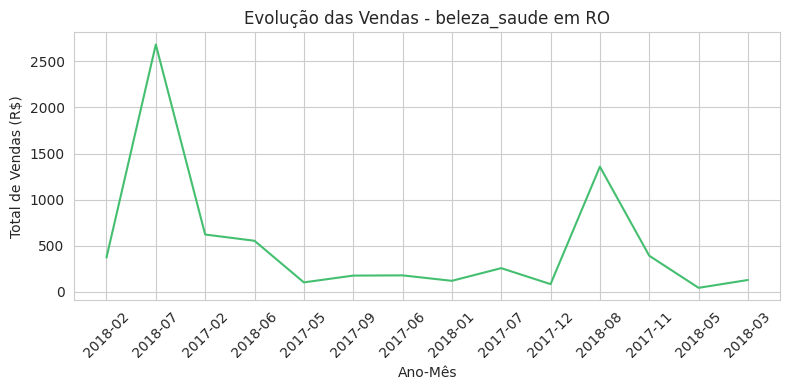

In [142]:
# Filtro
estado = 'RO'
categoria = 'beleza_saude'

df_filtrado = df_vendas_completas[
    (df_vendas_completas['customer_state'] == estado) &
    (df_vendas_completas['product_category_name'] == categoria)
]

# Plot
plt.figure(figsize=(8,4))
sns.lineplot(
    data=df_filtrado,
    x='year_month',
    y='price',
    estimator='sum',
    ci=None,
    color=sns.color_palette("viridis", as_cmap=True)(0.7)
)
plt.title(f"Evolução das Vendas - {categoria} em {estado}")
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Vendas (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#####Mapa de calor por estado

In [149]:
import plotly.express as px

df_mapa_calor = df_vendas_completas.groupby('customer_state').agg(
    total_vendas=('price', 'sum')
).reset_index()

fig = px.choropleth(
    df_mapa_calor,
    locations='customer_state',
    locationmode='geojson-id',
    color='total_vendas',
    color_continuous_scale='viridis',
    scope='south america',
    geojson='https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson',
    featureidkey="properties.sigla"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title="Mapa de Calor de Vendas por Estado", margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

#####Análise de vendedores

In [154]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Top 10 vendedores por volume de vendas
top_vendedores = df_analise_vendedores.sort_values(by='volume_vendas', ascending=False).head(10)

# Criando subplots: 3 gráficos empilhados
fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=False,
                       subplot_titles=(
                           "Top Vendedores - Volume de Vendas",
                           "Top Vendedores - Satisfação Média",
                           "Top Vendedores - Tempo Médio de Entrega (dias)"
                       ))

# Gráfico 1: Volume de vendas
fig.add_trace(go.Bar(
    y=top_vendedores['seller_id'],
    x=top_vendedores['volume_vendas'],
    orientation='h',
    marker=dict(color=top_vendedores['volume_vendas'], colorscale='Viridis'),
    name='Volume de Vendas'
), row=1, col=1)

# Gráfico 2: Média satisfação
fig.add_trace(go.Bar(
    y=top_vendedores['seller_id'],
    x=top_vendedores['media_satisfacao'],
    orientation='h',
    marker=dict(color=top_vendedores['media_satisfacao'], colorscale='Viridis'),
    name='Satisfação Média'
), row=2, col=1)

# Gráfico 3: Tempo médio de entrega (invertendo a cor para indicar que menos tempo é melhor)
fig.add_trace(go.Bar(
    y=top_vendedores['seller_id'],
    x=top_vendedores['tempo_entrega_medio'],
    orientation='h',
    marker=dict(color=top_vendedores['tempo_entrega_medio'], colorscale='Viridis_r'),
    name='Tempo Médio de Entrega'
), row=3, col=1)

fig.update_layout(height=900, showlegend=False)
fig.update_yaxes(autorange="reversed")  # Pra inverter eixo y e mostrar do maior pro menor

fig.show()

####Dashboards

In [157]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


#####Evolução de vendas por estado

In [169]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Converter timestamp para datetime
df_vendas_completas['order_purchase_timestamp'] = pd.to_datetime(df_vendas_completas['order_purchase_timestamp'])

# Lista de estados para dropdown (removendo nulos e ordenando)
estados = sorted(df_vendas_completas['customer_state'].dropna().unique())

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H2("Evolução das Vendas por Estado"),
    dcc.Dropdown(estados, value=estados[0], id='estado-dropdown'),
    dcc.Graph(id='grafico-evolucao')
])

@app.callback(
    Output('grafico-evolucao', 'figure'),
    Input('estado-dropdown', 'value')
)
def atualizar_grafico(estado_selecionado):
    df_filtrado = df_vendas_completas[df_vendas_completas['customer_state'] == estado_selecionado]

    # Agrupa vendas por mês
    df_agrupado = df_filtrado.groupby(df_filtrado['order_purchase_timestamp'].dt.to_period('M')).agg(total_vendas=('price', 'sum')).reset_index()
    df_agrupado['order_purchase_timestamp'] = df_agrupado['order_purchase_timestamp'].dt.to_timestamp()

    if df_agrupado.empty:
        fig = px.line(title=f"Sem dados para o estado {estado_selecionado}")
    else:
        fig = px.line(df_agrupado, x='order_purchase_timestamp', y='total_vendas',
                      title=f"Evolução Mensal das Vendas - Estado {estado_selecionado}",
                      labels={'order_purchase_timestamp': 'Mês', 'total_vendas': 'Total Vendas (R$)'})

    fig.update_layout(transition_duration=500)
    return fig

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>